In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # converts PIL image or numpy array into tensors

import matplotlib.pyplot as plt
import numpy

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.__version__)
print(device)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2.2.2
cpu


# Computer Vision Pictionary

------------------
# Data Processing and Handling
1000 images per class,

In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
from pathlib import Path

In [16]:
data_path = '../data'

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

walk_through_dir(data_path)

There are 2 directories and 1 images in '../data'.
There are 0 directories and 0 images in '../data/gray'.
There are 0 directories and 3 images in '../data/happiness'.


../data [PosixPath('../data/happiness/127-1500x800.jpg'), PosixPath('../data/happiness/what-is-true-happiness-large.jpg'), PosixPath('../data/happiness/th-3363386396.jpg')]
Random Image Path: ../data/happiness/127-1500x800.jpg
Image Class: happiness
Image height: 800
Image Width: 1500


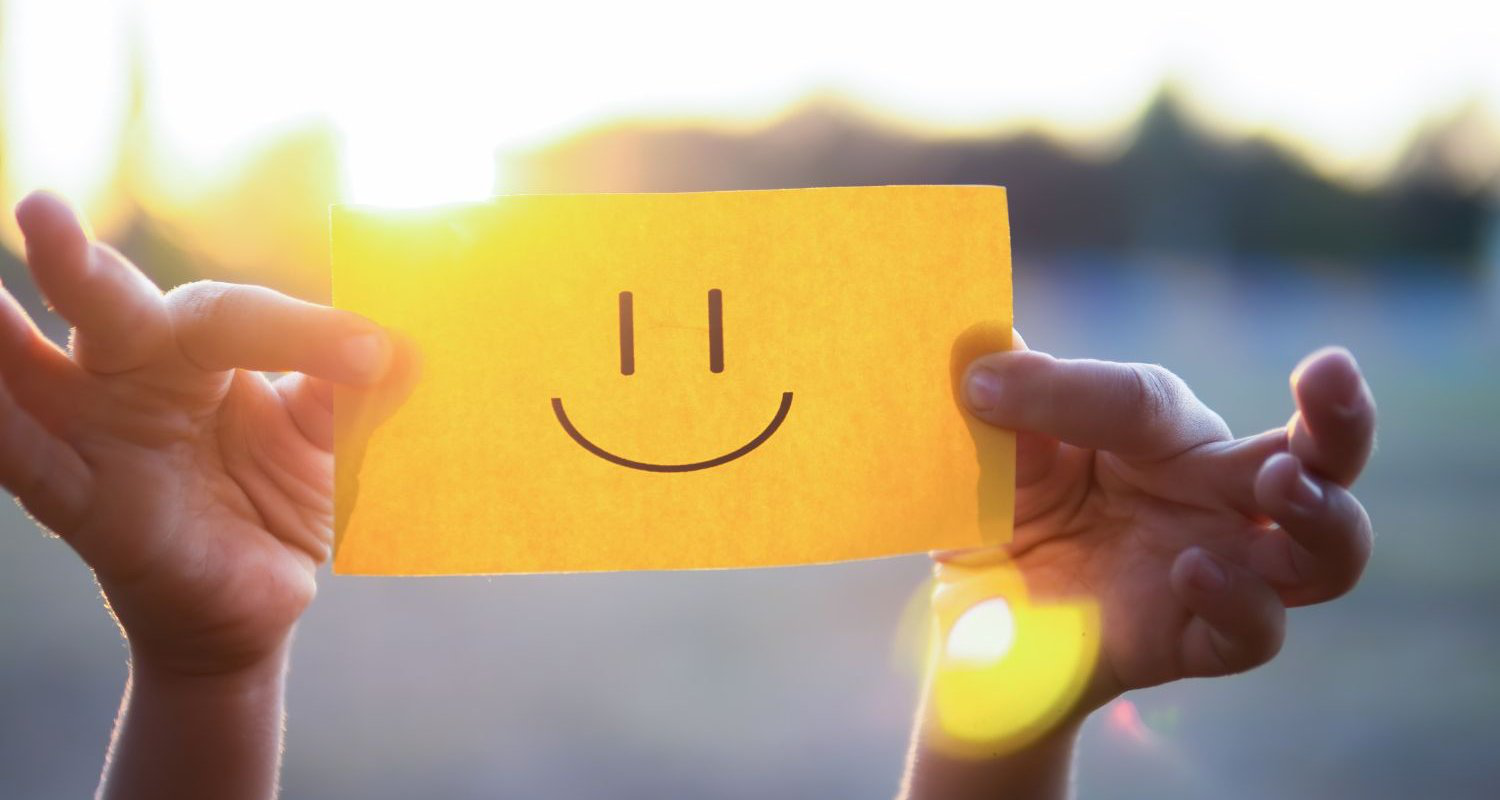

In [17]:
import random
from PIL import Image

image_path = Path(data_path)
image_path_list = list(image_path.glob('*/*.[jJ][pP][gG]'))
print(image_path, image_path_list)

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem # isolates what type of food it is

img = Image.open(random_image_path)

print(f'Random Image Path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image Width: {img.width}')
img

Text(0.5, 1.0, 'Image Class: happiness | Image Shape: (800, 1500, 3) -> [height, width, color_channels]')

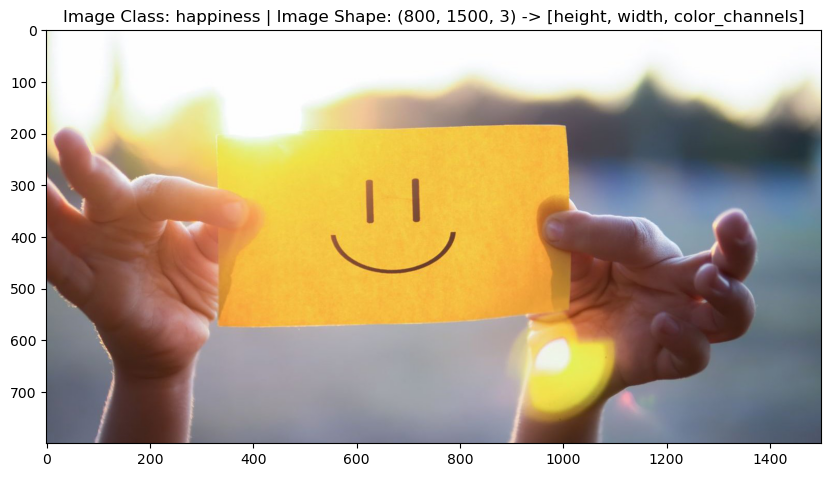

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# turn image into array
img_as_array = np.asarray(img)
# plot image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image Class: {image_class} | Image Shape: {img_as_array.shape} -> [height, width, color_channels]')

In [7]:
img_as_array # show image in numerical format.

array([[[228, 233, 203],
        [230, 234, 207],
        [234, 238, 211],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[228, 233, 203],
        [230, 234, 207],
        [234, 238, 211],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[228, 233, 203],
        [230, 234, 207],
        [233, 237, 210],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 90,  97, 116],
        [ 90,  97, 116],
        [ 90,  97, 116],
        ...,
        [ 77,  84, 102],
        [ 77,  84, 102],
        [ 77,  84, 102]],

       [[ 90,  97, 116],
        [ 90,  97, 116],
        [ 90,  97, 116],
        ...,
        [ 77,  84, 102],
        [ 77,  84, 102],
        [ 77,  84, 102]],

       [[ 90,  97, 116],
        [ 90,  97, 116],
        [ 90,  97, 116],
        ...,
        [ 77,  84, 102],
        [ 77,  84, 102],
        [ 77,  84, 102]]

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# using torchvision.transforms
# we start with jpeg images of varying sizes

data_transform = transforms.Compose([transforms.Resize(size=(600, 600)), # resize 
                                     transforms.RandomHorizontalFlip(p=0.5), # randomly flips an image horizontally
                                     transforms.ToTensor()]) # transforms to tensor
data_transform(img)

tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.9333, 0.9216, 0.9059],
         [0.9961, 0.9961, 0.9961,  ..., 0.9333, 0.9216, 0.9059],
         [0.9961, 0.9961, 0.9961,  ..., 0.9333, 0.9216, 0.9020],
         ...,
         [0.3020, 0.3020, 0.3059,  ..., 0.3529, 0.3529, 0.3529],
         [0.3020, 0.3020, 0.3059,  ..., 0.3529, 0.3529, 0.3529],
         [0.3020, 0.3020, 0.3059,  ..., 0.3529, 0.3529, 0.3529]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.9490, 0.9412, 0.9216],
         [0.9961, 0.9961, 0.9961,  ..., 0.9490, 0.9412, 0.9216],
         [0.9961, 0.9961, 0.9961,  ..., 0.9490, 0.9373, 0.9216],
         ...,
         [0.3294, 0.3294, 0.3333,  ..., 0.3804, 0.3804, 0.3804],
         [0.3294, 0.3294, 0.3333,  ..., 0.3804, 0.3804, 0.3804],
         [0.3294, 0.3294, 0.3333,  ..., 0.3804, 0.3804, 0.3804]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.8902, 0.8510, 0.8118],
         [0.9961, 0.9961, 0.9961,  ..., 0.8902, 0.8510, 0.8118],
         [0.9961, 0.9961, 0.9961,  ..., 0.8863, 0.8471, 0.

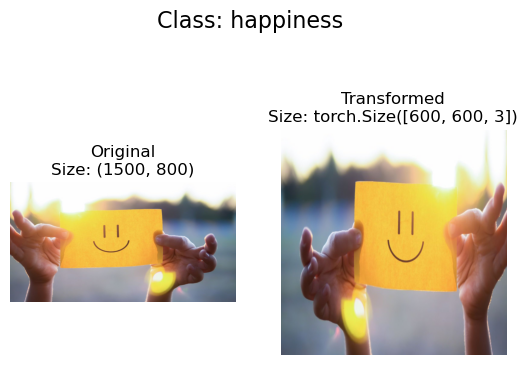

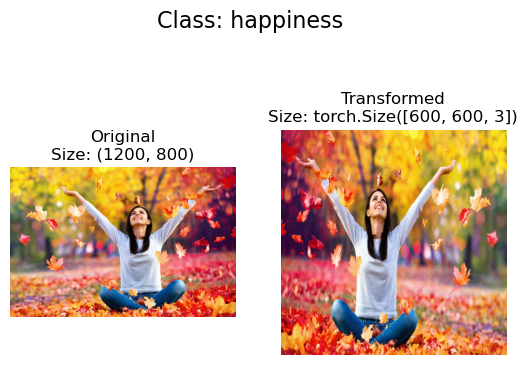

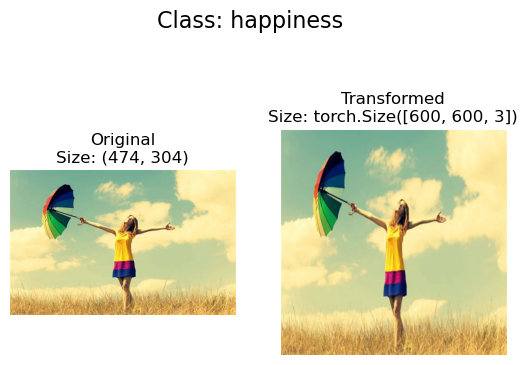

In [9]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  selects random images from a path of images, and loads/transforms them and plots the original vs transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
      ax[1].axis('off')

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

___________________
# The Dataloader

In [28]:
import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms

dataset = image_path_list

# Split the dataset into train (80%) and test (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for train and test datasets
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

print(f'Dataloaders \nTrain : {train_size} samples at {train_loader}\n Test : {test_size} samples at {test_loader}')

Dataloaders 
Train : 2 samples at <torch.utils.data.dataloader.DataLoader object at 0x12e575520>
 Test : 1 samples at <torch.utils.data.dataloader.DataLoader object at 0x12dca4ad0>


____________
# Model 1: TinyVGG 

This is the model based off of the tinyvgg architecture, modified to take 600 x 600

In [25]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2,
                                                   stride=2) # default stride is same as kernel size
                                      )
    self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2,
                                                   stride=2)
                                      )
    self.classifier = nn.Sequential(nn.Flatten(),
                                      nn.Linear(in_features=hidden_units, # get from errors
                                                out_features=output_shape))

    def forward(self,x):
      x = self.conv_block_1(x)
      print(x.shape)
      x = self.conv_block_2(x)
      print(x.shape)
      x = self.classifier(x)
      print(x.shape)
      return x